In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option('max_columns',50)
dataset1 = pd.read_csv('test_1.csv',delimiter = ',')
data_neg = dataset1.loc[(dataset1['class']==0) & (dataset1['proj_span']>1.0)]
data_pos = dataset1.loc[(dataset1['class']==1) & (dataset1['proj_span']>1.0)]
data_neg.describe()

,activity_intensity,class,final_teamsize,first_quater_teamsize,normalized_proj_span,num_CommitComment,num_Create,num_Delete,num_Fork,num_Gollum,num_IssueComment,num_Issues,num_Member,num_Public,num_PullRequest,num_PullRequestReviewComment,num_Push,num_Release,num_TeamAdd,num_Watch,proj_span
count,32767.000000,32767.0,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000
mean,0.923428,0.0,3.614399,3.518845,0.059637,0.068392,0.498245,0.088595,1.796686,0.284463,0.524613,0.523850,0.062563,0.017518,3.357799,0.552721,11.522263,0.025239,0.005768,0.502029,108.838099
std,2.362461,0.0,218.743613,218.744890,0.109041,0.917918,1.534956,1.069972,212.679915,6.028755,7.722535,4.925518,0.440286,0.166829,32.149314,18.928829,44.226355,0.485023,0.085568,6.386845,198.998920
min,0.001698,0.0,1.000000,0.000000,0.001096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.093750,0.0,1.000000,1.000000,0.003288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000
50%,0.333333,0.0,1.000000,1.000000,0.014247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,26.000000
75%,1.000000,0.0,2.000000,2.000000,0.062466,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,114.000000
max,267.739130,0.0,39519.000000,39519.000000,0.948493,89.000000,68.000000,114.000000,38469.000000,649.000000,524.000000,263.000000,34.000000,13.000000,4139.000000,2625.000000,6158.000000,54.000000,3.000000,607.000000,1731.000000


In [3]:
data_pos.describe()

,activity_intensity,class,final_teamsize,first_quater_teamsize,normalized_proj_span,num_CommitComment,num_Create,num_Delete,num_Fork,num_Gollum,num_IssueComment,num_Issues,num_Member,num_Public,num_PullRequest,num_PullRequestReviewComment,num_Push,num_Release,num_TeamAdd,num_Watch,proj_span
count,6599.000000,6599.0,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000
mean,0.414597,1.0,3.785422,3.709047,0.138339,0.160630,1.577057,1.689347,0.695105,0.337778,2.873314,2.131990,0.048947,0.008789,6.921200,1.666919,11.979997,0.103349,0.006365,1.114411,252.468556
std,1.288657,0.0,14.504988,14.521296,0.177079,1.755938,4.001526,6.365987,3.962130,4.665145,26.237045,15.069949,0.375272,0.098095,37.258673,19.276454,44.126742,0.807054,0.088548,8.599194,323.169403
min,0.001468,1.0,1.000000,0.000000,0.001096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.026759,1.0,1.000000,1.000000,0.015342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,28.000000
50%,0.073770,1.0,1.000000,1.000000,0.081644,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,149.000000
75%,0.333333,1.0,2.000000,2.000000,0.155616,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,5.000000,0.000000,0.000000,0.000000,284.000000
max,69.000000,1.0,441.000000,441.000000,0.986301,57.000000,117.000000,112.000000,158.000000,153.000000,868.000000,401.000000,14.000000,2.000000,1597.000000,1003.000000,1494.000000,22.000000,3.000000,297.000000,1800.000000


In [4]:
dataset = pd.read_csv('test.csv',delimiter = ',')
dataset1 = pd.read_csv('test_1.csv',delimiter = ',') # this one does not take care the CRAN before GH date
dataset = dataset.loc[dataset['proj_span'] > 1.0]
dataset1 = dataset1.loc[dataset1['proj_span'] >= 2.0]

In [5]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(39366, 22)

In [6]:
X_1 = (dataset1.drop('class', axis=1)).drop('id', axis=1)
y_1 = dataset1['class']
dataset1.shape

(39366, 22)

In [7]:

dataset1.describe()

,activity_intensity,class,final_teamsize,first_quater_teamsize,normalized_proj_span,num_CommitComment,num_Create,num_Delete,num_Fork,num_Gollum,num_IssueComment,num_Issues,num_Member,num_Public,num_PullRequest,num_PullRequestReviewComment,num_Push,num_Release,num_TeamAdd,num_Watch,proj_span
count,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000,39366.000000
mean,0.838132,0.167632,3.643068,3.550729,0.072830,0.083854,0.679089,0.356932,1.612026,0.293400,0.918331,0.793426,0.060280,0.016054,3.955139,0.739496,11.598994,0.038333,0.005868,0.604684,132.915155
std,2.227123,0.373544,199.656830,199.658196,0.126557,1.104224,2.192565,2.846582,194.043551,5.822475,12.875956,7.656343,0.430099,0.157448,33.087215,18.991860,44.209443,0.553023,0.086074,6.811762,230.966802
min,0.001468,0.000000,1.000000,0.000000,0.001096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.069652,0.000000,1.000000,1.000000,0.003836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000
50%,0.272727,0.000000,1.000000,1.000000,0.018082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,33.000000
75%,1.000000,0.000000,2.000000,2.000000,0.085479,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,156.000000
max,267.739130,1.000000,39519.000000,39519.000000,0.986301,89.000000,117.000000,114.000000,38469.000000,649.000000,868.000000,401.000000,34.000000,13.000000,4139.000000,2625.000000,6158.000000,54.000000,3.000000,607.000000,1800.000000


In [8]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3, random_state=20190101)
X_tr_1, X_test_1, y_tr_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=20190101)

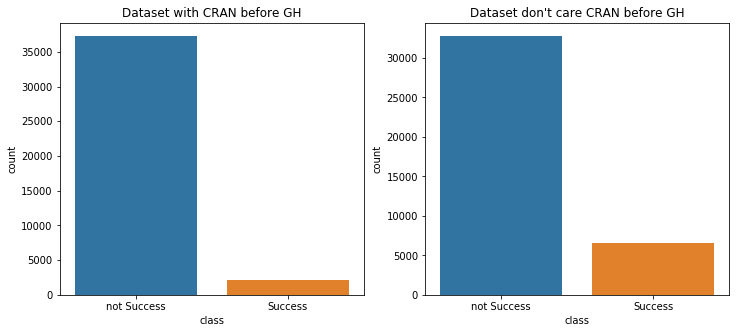

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset with CRAN before GH')
ax2 = plt.subplot(1,2,2)
sns.countplot(x='class', data=dataset1)
ax2.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset don\'t care CRAN before GH')
plt.show()

In [10]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_test)

Classification accuracy of the LogisticRegression classifier on training set: 0.94513
Precision on train: 0.31771
Recall on train: 0.04230

Classification accuracy of the LogisticRegression classifier on test set: 0.94412
Precision on test: 0.32584
Recall on test: 0.04610


array([[11121,    60],
       [  600,    29]])

In [11]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-1.24150512e+00 -3.24813747e-01  6.89456216e-02  4.22379714e-07
   1.12096604e-01  3.31389776e-01 -1.74996849e-01  1.95700415e-01
  -3.21859776e-02  2.41941172e-02  3.15704359e-03 -2.95524162e-02
  -2.70498689e-02  1.07584707e-02  7.15512013e-03 -6.69628573e-03
   1.32773879e-01 -2.22732387e-03  2.81073505e-01  7.70842977e-04]]
[-2.21141299]


In [12]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

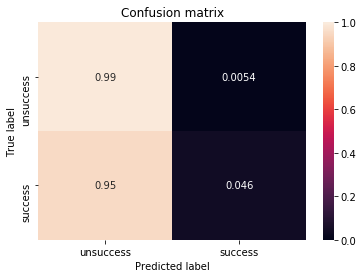

In [13]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [14]:
# on dataset_1
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr_1, y_tr_1)
ca = lr.score(X_tr_1, y_tr_1)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test_1, y_test_1)
y_pred = lr.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.84537
Precision on train: 0.67264
Recall on train: 0.14670

Classification accuracy of the LogisticRegression classifier on test set: 0.84530
Precision on test: 0.67826
Recall on test: 0.15671


In [15]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-9.67046709e-01 -1.44314044e-01  1.80809077e-01  8.10955931e-07
  -2.22383761e-02  2.76420958e-01  2.37927008e-01 -1.40086391e-01
   1.54748812e-02  2.70170852e-02 -5.71456474e-03 -5.90410623e-02
  -6.42280777e-02  2.40760462e-03 -3.98948947e-04 -1.70851689e-02
  -2.44550198e-02 -1.49054990e-02 -2.59923974e-02  1.47999457e-03]]
[-1.55907892]


In [16]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [17]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_test = ss.transform(X_test)

ss1 = StandardScaler()
ss1.fit(X_tr_1)
X_tr_1 = ss.transform(X_tr_1)
X_test_1 = ss.transform(X_test_1)

In [18]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.94691
Precision on train: 0.41463
Recall on train: 0.03537

Classification accuracy of the LogisticRegression classifier on test set: 0.94547
Precision on test: 0.35294
Recall on test: 0.02862


In [19]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-0.16692833 -0.20820824  0.4404136   0.21578104  0.04120374  0.47963519
  -0.67068619 -0.54923986 -0.05570919 -0.05776945  0.10324113  0.00562968
  -0.0240435   0.03198361  0.0103087  -0.08197227 -0.0325428  -0.03617368
   0.01571466  0.21578104]]
[-3.15825134]


In [20]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [21]:
# on dataset_1
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr_1, y_tr_1)
ca = lr.score(X_tr_1, y_tr_1)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test_1, y_test_1)
y_pred = lr.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.84653
Precision on train: 0.66435
Recall on train: 0.16623

Classification accuracy of the LogisticRegression classifier on test set: 0.84522
Precision on test: 0.66139
Recall on test: 0.16775


In [22]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-1.22112402 -0.17229851  1.24847257  0.21926356 -0.11882568  0.69732701
   0.71263477 -1.74825223 -0.05437738  0.14531502  0.06361349 -0.10125601
  -0.25669011 -0.00578376  0.02643343 -0.71087178 -0.16501884 -0.09806605
  -0.31185927  0.21926356]]
[-1.92444122]


In [23]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
accuracy_score_test = rf.score(X_test, y_test)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9933226883437364
Precision on train: 0.98988
Recall on train: 0.88141

Accuracy score on the test dataset: 0.94666
Precision on test: 0.49708
Recall on test: 0.13514


In [25]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [26]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. activity_intensity
2. proj_span
3. normalized_proj_span
4. num_Push
5. num_Create
6. num_PullRequest
7. first_quater_teamsize
8. final_teamsize
9. num_Issues
10. num_Fork


In [27]:
# dataset_1
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr_1, y_tr_1)
y_pred = rf.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
accuracy_score_train = rf.score(X_tr_1, y_tr_1)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
accuracy_score_test = rf.score(X_test_1, y_test_1)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9781172884308318
Precision on train: 0.98475
Recall on train: 0.88281

Accuracy score on the test dataset: 0.88273
Precision on test: 0.72612
Recall on test: 0.48870


In [28]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [29]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. activity_intensity
2. proj_span
3. normalized_proj_span
4. num_Create
5. num_Push
6. num_Delete
7. num_PullRequest
8. first_quater_teamsize
9. final_teamsize
10. num_Fork


In [30]:
# svc_linear = SVC(kernel='linear')
# svc_linear.fit(X_tr, y_tr)
# ca = svc_linear.score(X_tr, y_tr)
# print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_linear.score(X_test, y_test)
# print('Linear SVC classification accuracy on test set: {:.5f}'.format(ca))

In [31]:


svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_test, y_test)
print('Radial Basis Function SVC classification accuracy on test set: {:.5f}'.format(ca))

# svc_poly = SVC(kernel='poly')
# svc_poly.fit(X_tr, y_tr)
# ca = svc_poly.score(X_tr, y_tr)
# print('\nPolynomial SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_poly.score(X_test, y_test)
# print('Polynomial SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.95177
Radial Basis Function SVC classification accuracy on test set: 0.94657


In [32]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))


Precision on train: 0.96694
Recall on train: 0.08114
Precision on test: 0.41667
Recall on test: 0.00795


In [33]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr_1, y_tr_1)
ca = svc_rbf.score(X_tr_1, y_tr_1)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_test_1, y_test_1)
print('Radial Basis Function SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.86863
Radial Basis Function SVC classification accuracy on test set: 0.86063


In [34]:
y_pred = svc_rbf.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Precision on train: 0.87883
Recall on train: 0.24870
Precision on test: 0.83890
Recall on test: 0.21447
